### Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parâmetros

In [2]:
TAMANHO_MALHA = 100

### Estruturas de dados

Para cada célula existe uma tupla com três valores (id_material, dx, dy), mas nesse exeplo
o material vai ser constante. E em vez de usar valores de tuplas para cada celula de matriz, iremos criar duas matrizes distintas com os valores para cada indice da tupla do modelo de Colombo.

In [3]:
dx = np.full((TAMANHO_MALHA, TAMANHO_MALHA), np.inf)
dy = np.full((TAMANHO_MALHA, TAMANHO_MALHA), np.inf)

A matriz obstaculos é definida para experimentos de comportamento do autômato em casos de obstáculos a sua frente,
essa matriz vai ser base para a busca mais eficiente. 

In [4]:
obstaculos = np.zeros((TAMANHO_MALHA, TAMANHO_MALHA), dtype=bool)

### Funções especiais

- Fução de atribuição do novo valor da célula em relação aos seus vizinhos.
  Em autômatos celulares, o valor da célula e definido com base nos seus  vizinhos, criaremos uma funcao que faz esse mapeameto do modelo (von Neumann)
  e somando os vizinhos com os repectivios vetores unitários - (1,0) para vinzinhos horizontais e (0,1) para vizinhos verticais -, logo após será
  atribuído a célula a menor direção. 

In [5]:
def novo_valor_celula(i, j, dx, dy):
    
    # Vizinhos do tipo von Neumann
    # Soma todos os vizinhos com vetores unitarios correspondetes

    # vizinho(i, j) + vetor_unitario(x, y)
    cima     = (dx[i-1, j]    , dy[i-1, j] + 1) # + (0,1)
    baixo    = (dx[i+1, j]    , dy[i+1, j] + 1) # + (0,1)
    esquerda = (dx[i, j-1] + 1, dy[i, j-1]    ) # + (1,0)
    direita  = (dx[i, j+1] + 1, dy[i, j+1]    ) # + (1,0)

    nova_celula = dx[i,j], dy[i, j]
    melhor_distancia = dx[i,j]**2 + dy[i,j]**2

    for vdx, vdy in [cima, baixo, esquerda, direita]:
        nova_distancia = vdx**2 + vdy**2

        # Melhor distância entre os vizinhos será o novo valor da célula
        if nova_distancia < melhor_distancia:
            melhor_distancia = nova_distancia
            nova_celula = vdx, vdy
    
    
    return nova_celula

- Função de processamento, ela é reponsável por todo o processo de mapeamento de cada célula e atribuição dos seus valores no tempo de $(t+1)$.

In [6]:
def processar(dx, dy, obstaculos=None):

    # Cópia do modelo para evitar conflitos na leitura dos estados
    ndx = dx.copy()
    ndy = dy.copy()

    # Percorrer toda a matriz
    for i in range(1, TAMANHO_MALHA-1):
        for j in range(1, TAMANHO_MALHA-1):

            # Não processa a celula, pois é um obstaculo
            if not obstaculos is None and obstaculos[i,j]: continue
                
            # Processa o novo valor para cada célula
            ndx[i,j], ndy[i,j] = novo_valor_celula(i, j, dx, dy)

    return ndx, ndy

- Função de visualização, ela realiza o calculo de magnitude das distâncias do modelo, e plota por padrão as cores ao decorrer do tempo ou
  o padrão de ondas quando o parâmetro **seno** é verdadeiro.

In [7]:
def visualizacao(dx, dy, titulo="", seno=False):

    mapa = np.sqrt(dx**2 + dy**2)
    
    if seno: 
        mapa[mapa == np.inf] = np.nan
        mapa = np.sin(mapa)
        
    plt.figure()
    img = plt.imshow(mapa, cmap="viridis", origin="lower")
    plt.colorbar(img)
    plt.title(titulo)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Simulações


### Simulação de pontos de emissão de ondas

Único ponto no eixo zero

In [8]:
# Parametrização
TAMANHO_MALHA = 100

# Modelo
dx = np.full((TAMANHO_MALHA, TAMANHO_MALHA), np.inf)
dy = np.full((TAMANHO_MALHA, TAMANHO_MALHA), np.inf)

# Definição do ponto de emissão
dx[1,1], dy[1,1] = (0,0)

for tempo in range(200):
    dx, dy = processar(dx, dy)

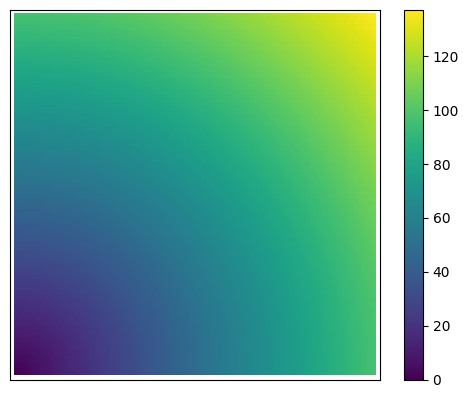

In [9]:
visualizacao(dx, dy)

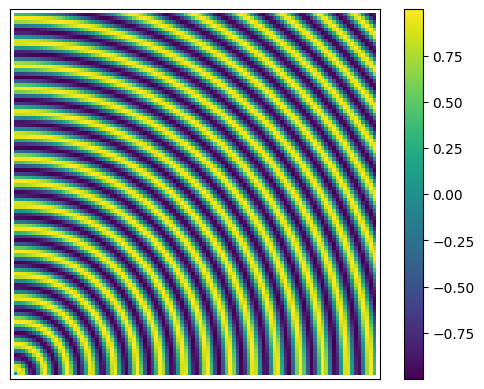

In [10]:
visualizacao(dx, dy, seno=True)

Único ponto no centro

In [11]:
# Parametrização
TAMANHO_MALHA = 100

# Modelo
dx = np.full((TAMANHO_MALHA, TAMANHO_MALHA), np.inf)
dy = np.full((TAMANHO_MALHA, TAMANHO_MALHA), np.inf)

# Definição do ponto central de emissão
dx[50,50], dy[50,50] = (0,0)

for tempo in range(100):
    dx, dy = processar(dx, dy)

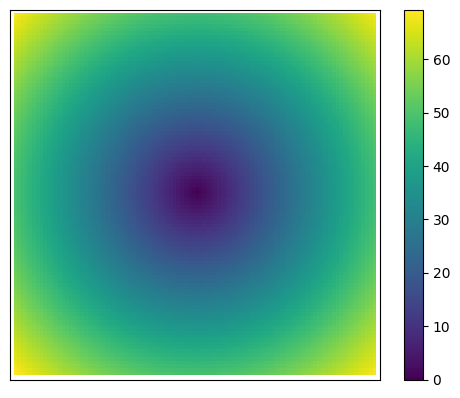

In [12]:
visualizacao(dx, dy)

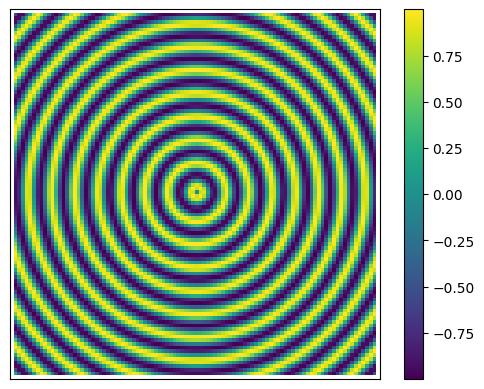

In [13]:
visualizacao(dx, dy, seno=True)

Frente de onda linear saindo do eixo y

In [14]:
# Parametrização
TAMANHO_MALHA = 100

# Modelo
dx = np.full((TAMANHO_MALHA, TAMANHO_MALHA), np.inf)
dy = np.full((TAMANHO_MALHA, TAMANHO_MALHA), np.inf)

# Definição dos pontos laterais de emissão
for i in range(100):
    dx[i,0], dy[i,0] = (0,0)

for tempo in range(100):
    dx, dy = processar(dx, dy)

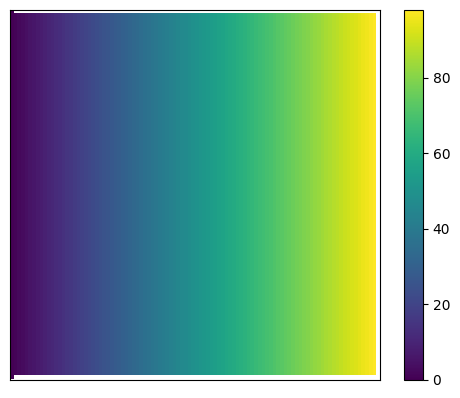

In [15]:
visualizacao(dx, dy)

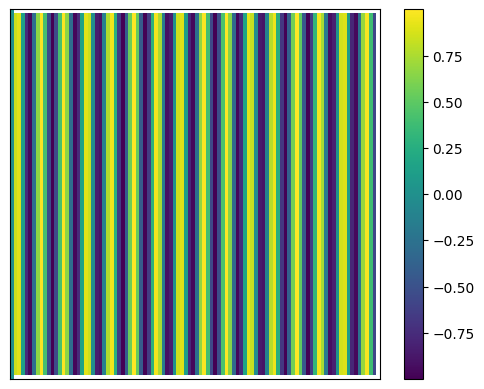

In [16]:
visualizacao(dx, dy, seno=True)

### Simulação do princípio de Huygens.

O princípio de Huygens explica que, ao passar por uma fenda, a luz se comporta como uma frente de onda onde cada ponto na abertura atua como uma nova fonte de ondas secundárias (ondículas).

In [17]:
# Parametrização
TAMANHO_MALHA = 100

# Modelo
dx = np.full((TAMANHO_MALHA, TAMANHO_MALHA), np.inf)
dy = np.full((TAMANHO_MALHA, TAMANHO_MALHA), np.inf)
obstaculos 

# Definição dos pontos laterais de emissão
for i in range(100):
    dx[i,0], dy[i,0] = (0,0)

# Definição dos obstaculos centrias com uma fenda
obstaculos = np.zeros((TAMANHO_MALHA, TAMANHO_MALHA), dtype=bool)
for i in range(100):
    obstaculos[i,50] = i != 50

for tempo in range(200):
    dx, dy = processar(dx, dy, obstaculos)

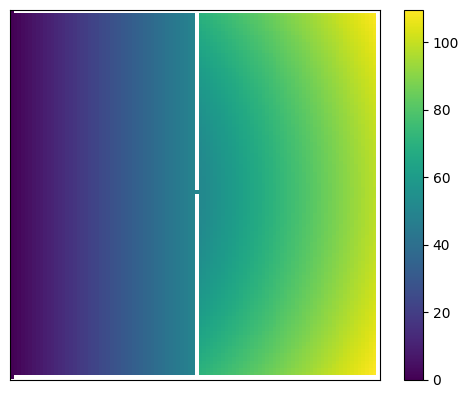

In [18]:
visualizacao(dx, dy)

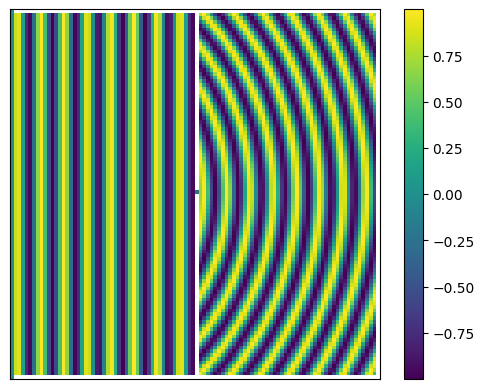

In [19]:
visualizacao(dx, dy, seno=True)

In [20]:
# Parametrização
TAMANHO_MALHA = 100

# Modelo
dx = np.full((TAMANHO_MALHA, TAMANHO_MALHA), np.inf)
dy = np.full((TAMANHO_MALHA, TAMANHO_MALHA), np.inf)
obstaculos 

# Definição dos pontos laterais de emissão
for i in range(100):
    dx[i,0], dy[i,0] = (0,0)

# Definição dos obstaculos centrias com uma fenda
obstaculos = np.zeros((TAMANHO_MALHA, TAMANHO_MALHA), dtype=bool)
for i in range(100):
    obstaculos[i,50] = i % 20 != 0

for tempo in range(200):
    dx, dy = processar(dx, dy, obstaculos)

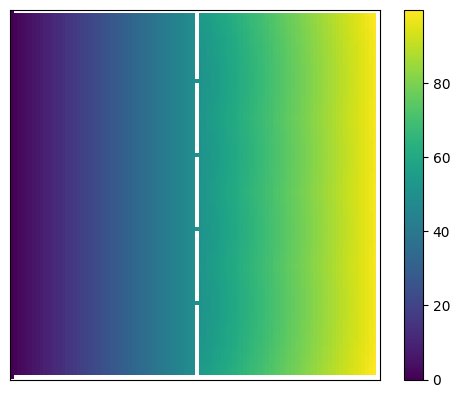

In [21]:
visualizacao(dx, dy)

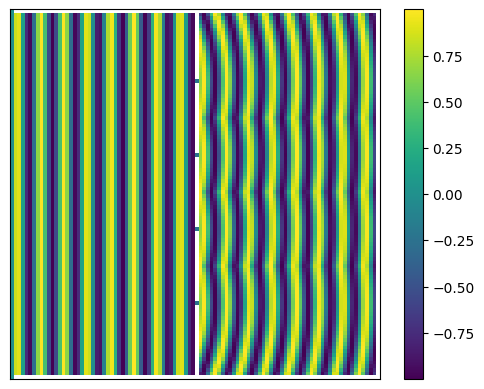

In [22]:
mapa = visualizacao(dx, dy, seno=True)

Resultado do padrão de interferencia das fendas na simulação, pegando somente os valores da coluna 90.

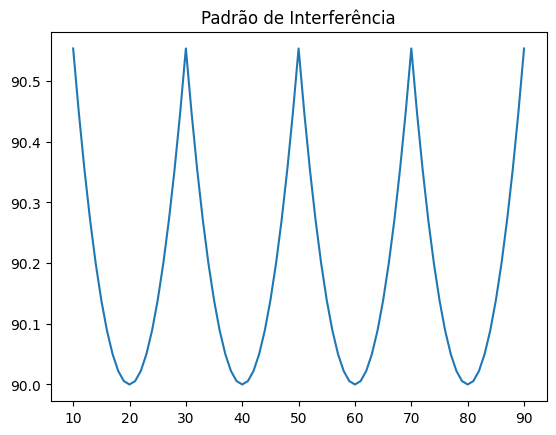

In [23]:
interferencia = np.sqrt(dy.T[90]**2 + dx.T[90]**2)
x = range(10,91)
y = interferencia[10:91]

plt.plot(x, y)
plt.title("Padrão de Interferência")
plt.show()